In [50]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

In [51]:
data = pd.read_csv('movies.csv')
data.head()

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,"2,684,051",9.0,PG-13,2h 32m,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."
3,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,"1,285,350",9.0,R,3h 22m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ..."
4,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,"800,954",9.0,Approved,1h 36m,"Crime,Drama",...,nm0001486,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...


In [52]:
director = data['director_name'].tolist()
print(type(director))
print(director)

<class 'list'>
['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan', 'Francis Ford Coppola', 'Sidney Lumet', 'Steven Spielberg', 'Peter Jackson', 'Quentin Tarantino', 'Peter Jackson', 'Sergio Leone', 'Robert Zemeckis', 'David Fincher', 'Peter Jackson', 'Christopher Nolan', 'Irvin Kershner', 'Lana Wachowski,Lilly Wachowski', 'Martin Scorsese', 'Milos Forman', 'David Fincher', 'Akira Kurosawa', 'Frank Capra', 'Jonathan Demme', 'Steven Spielberg', 'Fernando Meirelles,Kátia Lund', 'Christopher Nolan', 'Roberto Benigni', 'Frank Darabont', 'George Lucas', 'James Cameron', 'Robert Zemeckis', 'Hayao Miyazaki', 'Roman Polanski', 'Alfred Hitchcock', 'Bong Joon Ho', 'Luc Besson', 'Roger Allers,Rob Minkoff', 'Ridley Scott', 'Tony Kaye', 'Martin Scorsese', 'Bryan Singer', 'Christopher Nolan', 'Damien Chazelle', 'Michael Curtiz', 'Isao Takahata', 'Masaki Kobayashi', 'Olivier Nakache,Éric Toledano', 'Charles Chaplin', 'Sergio Leone', 'Giuseppe Tornatore', 'Alfred Hitchcock', 'Ridley Scott',

In [57]:
dr_count = {i:director.count(i) for i in director}
print(dr_count)

{'Frank Darabont': 2, 'Francis Ford Coppola': 3, 'Christopher Nolan': 7, 'Sidney Lumet': 2, 'Steven Spielberg': 7, 'Peter Jackson': 3, 'Quentin Tarantino': 5, 'Sergio Leone': 4, 'Robert Zemeckis': 2, 'David Fincher': 3, 'Irvin Kershner': 1, 'Lana Wachowski,Lilly Wachowski': 1, 'Martin Scorsese': 7, 'Milos Forman': 2, 'Akira Kurosawa': 7, 'Frank Capra': 3, 'Jonathan Demme': 1, 'Fernando Meirelles,Kátia Lund': 1, 'Roberto Benigni': 1, 'George Lucas': 1, 'James Cameron': 3, 'Hayao Miyazaki': 4, 'Roman Polanski': 2, 'Alfred Hitchcock': 6, 'Bong Joon Ho': 2, 'Luc Besson': 1, 'Roger Allers,Rob Minkoff': 1, 'Ridley Scott': 3, 'Tony Kaye': 1, 'Bryan Singer': 1, 'Damien Chazelle': 1, 'Michael Curtiz': 1, 'Isao Takahata': 1, 'Masaki Kobayashi': 1, 'Olivier Nakache,Éric Toledano': 1, 'Charles Chaplin': 5, 'Giuseppe Tornatore': 1, 'Andrew Stanton': 1, 'Florian Henckel von Donnersmarck': 1, 'Billy Wilder': 5, 'Stanley Kubrick': 7, 'Anthony Russo,Joe Russo': 2, 'Bob Persichetti,Peter Ramsey,Rodney R

In [58]:
from collections import Counter

In [59]:
dr_counter = Counter(director)
print(dr_counter)

Counter({'Christopher Nolan': 7, 'Steven Spielberg': 7, 'Martin Scorsese': 7, 'Akira Kurosawa': 7, 'Stanley Kubrick': 7, 'Alfred Hitchcock': 6, 'Quentin Tarantino': 5, 'Charles Chaplin': 5, 'Billy Wilder': 5, 'Sergio Leone': 4, 'Hayao Miyazaki': 4, 'Francis Ford Coppola': 3, 'Peter Jackson': 3, 'David Fincher': 3, 'Frank Capra': 3, 'James Cameron': 3, 'Ridley Scott': 3, 'Clint Eastwood': 3, 'Ingmar Bergman': 3, 'Frank Darabont': 2, 'Sidney Lumet': 2, 'Robert Zemeckis': 2, 'Milos Forman': 2, 'Roman Polanski': 2, 'Bong Joon Ho': 2, 'Anthony Russo,Joe Russo': 2, 'Sam Mendes': 2, 'Park Chan-wook': 2, 'Mel Gibson': 2, 'Fritz Lang': 2, 'David Lean': 2, 'Denis Villeneuve': 2, 'Guy Ritchie': 2, 'Peter Weir': 2, 'Ron Howard': 2, 'Joel Coen,Ethan Coen': 2, 'Richard Linklater': 2, 'William Wyler': 2, 'James Mangold': 2, 'Brad Bird': 2, 'Irvin Kershner': 1, 'Lana Wachowski,Lilly Wachowski': 1, 'Jonathan Demme': 1, 'Fernando Meirelles,Kátia Lund': 1, 'Roberto Benigni': 1, 'George Lucas': 1, 'Luc Be

In [60]:
dr_counter

Counter({'Frank Darabont': 2,
         'Francis Ford Coppola': 3,
         'Christopher Nolan': 7,
         'Sidney Lumet': 2,
         'Steven Spielberg': 7,
         'Peter Jackson': 3,
         'Quentin Tarantino': 5,
         'Sergio Leone': 4,
         'Robert Zemeckis': 2,
         'David Fincher': 3,
         'Irvin Kershner': 1,
         'Lana Wachowski,Lilly Wachowski': 1,
         'Martin Scorsese': 7,
         'Milos Forman': 2,
         'Akira Kurosawa': 7,
         'Frank Capra': 3,
         'Jonathan Demme': 1,
         'Fernando Meirelles,Kátia Lund': 1,
         'Roberto Benigni': 1,
         'George Lucas': 1,
         'James Cameron': 3,
         'Hayao Miyazaki': 4,
         'Roman Polanski': 2,
         'Alfred Hitchcock': 6,
         'Bong Joon Ho': 2,
         'Luc Besson': 1,
         'Roger Allers,Rob Minkoff': 1,
         'Ridley Scott': 3,
         'Tony Kaye': 1,
         'Bryan Singer': 1,
         'Damien Chazelle': 1,
         'Michael Curtiz': 1,
        

In [69]:
mask = np.array(Image.open("film.png"))

In [70]:
wordcloud = WordCloud(background_color="white", mask = mask)
wordcloud.generate_from_frequencies(dr_counter)

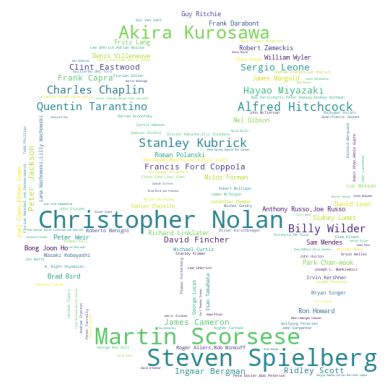

<Figure size 1000x1000 with 0 Axes>

In [72]:
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(10,10))
plt.show()